# Indian Agricultural Crop Yield Predictions

## Importing Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px



In [2]:
# Loading the dataset
df = pd.read_csv('crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [4]:
df.Crop.unique()

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

In [5]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (19689, 10)


# Preprocessing of the dataset

In [6]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [8]:
# to check the unique values
for i in df.columns:
    print("******************************",i,"*********************************")
    print()
    print(set(df[i].tolist()))
    print()

****************************** Crop *********************************

{'Arecanut', 'Jowar', 'Tobacco', 'Onion', 'Sunflower', 'Rapeseed &Mustard', 'Horse-gram', 'Sugarcane', 'Khesari', 'Other Summer Pulses', 'Linseed', 'Other  Rabi pulses', 'Groundnut', 'Sesamum', 'Cowpea(Lobia)', 'Ginger', 'Peas & beans (Pulses)', 'Black pepper', 'Arhar/Tur', 'Guar seed', 'Maize', 'Moong(Green Gram)', 'Jute', 'Cotton(lint)', 'Rice', 'Wheat', 'Coriander', 'Soyabean', 'Banana', 'Tapioca', 'Masoor', 'Urad', 'Gram', 'Potato', 'Cashewnut', 'Turmeric', 'Niger seed', 'other oilseeds', 'Cardamom', 'Other Kharif pulses', 'Oilseeds total', 'Garlic', 'Small millets', 'Coconut ', 'Dry chillies', 'Bajra', 'Mesta', 'Sannhamp', 'Other Cereals', 'Ragi', 'Castor seed', 'Sweet potato', 'Moth', 'Barley', 'Safflower'}

****************************** Crop_Year *********************************

{1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 20

In [9]:
# Check the duplicates record
df.duplicated().sum()

0

In [10]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

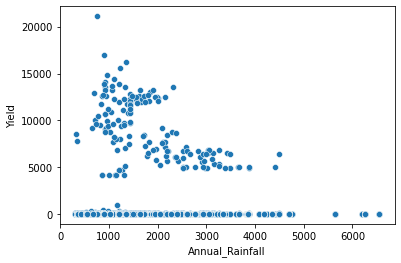

In [16]:
sns.scatterplot(x = df['Annual_Rainfall'], y = df['Yield'])
plt.show

# Year wise analysis of agricultural production

In [17]:
df_year = df[df['Crop_Year']!=2020]  # As the data of 2020 is incomplete

In [18]:
year_yield = df_year.groupby('Crop_Year').sum() 
year_yield

C:\Users\TANAYA\AppData\Local\Temp/ipykernel_7804/2735538965.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_yield = df_year.groupby('Crop_Year').sum()


,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,
1997,1.660686e+08,6087009873,6.542691e+05,1.580475e+10,5.148126e+07,26187.756592
1998,1.501238e+08,7868086697,1.138474e+06,1.483223e+10,4.353590e+07,36136.246483
1999,1.470574e+08,8550025528,1.033857e+06,1.560720e+10,3.970550e+07,50013.419395
2000,1.475277e+08,9562470060,1.119624e+06,1.448280e+10,3.835721e+07,58342.279827
2001,1.456943e+08,9314563490,1.055077e+06,1.487976e+10,3.788053e+07,56581.195447
2002,1.427858e+08,12409349456,1.040622e+06,1.351753e+10,3.569644e+07,65734.814831
2003,1.496968e+08,12313711969,1.135610e+06,1.481699e+10,3.592724e+07,67039.368873
2004,1.480245e+08,13817065380,1.141189e+06,1.603697e+10,3.108514e+07,63905.917053
2005,1.479183e+08,14951210018,1.185828e+06,1.773836e+10,3.106285e+07,70140.586280


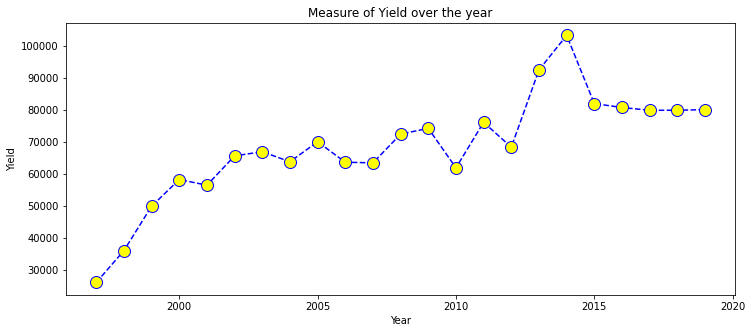

In [19]:
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Yield'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

#### It can be observed that the yield has increased over the year, but after 2014 it is showing the declining trend. Reasons can be climate change, decrease in soil fertility

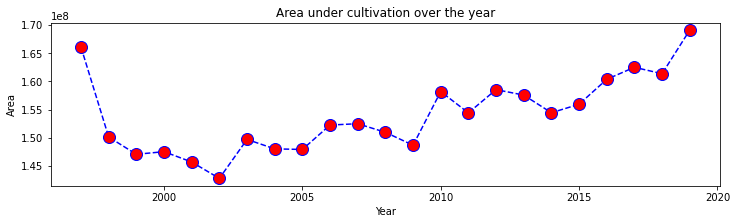

In [20]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Area'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the year')
plt.show()

### It can be observed that the area under cultivation has increased substantially. Either with the help of fertilizer and more irrigation fallow land is now under cultivation or area under forest is used for agriculture.

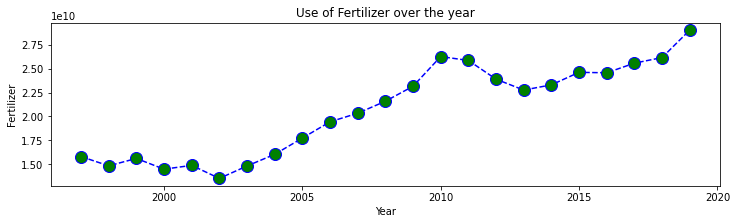

In [21]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()

### The use of Fertilizer in the fields is increasing

In [22]:
# plt.figure(figsize = (12,3))
# plt.plot(year_yield.index, year_yield['Pesticide'],color='red', linestyle='dashed', marker='o', 
#         markersize=12, markerfacecolor='cyan')
# plt.xlabel('Year')
# plt.ylabel('Pesticide')
# plt.title('Use of Pesticide over the Year')
# plt.show()

# State wise analysis of agricultural production

In [11]:
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state

C:\Users\TANAYA\AppData\Local\Temp/ipykernel_36560/1277288209.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_state = df.groupby('State').sum()


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
State,,,,,,,
West Bengal,2196856,2.376823e+08,8941179120,1.883456e+06,2.970480e+10,6.612665e+07,291986.752179
Puducherry,1346899,6.535410e+05,493815573,9.599160e+05,8.480729e+07,1.705159e+05,232163.600840
Andhra Pradesh,2543550,2.389253e+08,26076218605,1.160140e+06,3.125890e+10,6.210724e+07,229735.184723
Tamil Nadu,1652030,1.103728e+08,78051759253,7.654142e+05,1.473239e+10,2.956305e+07,185813.281648
Assam,1468138,7.734260e+07,3637714928,1.531493e+06,1.029304e+10,2.093547e+07,160612.648362
Karnataka,2876568,2.579074e+08,63772797366,1.692393e+06,3.458024e+10,6.917312e+07,151391.867808
Kerala,1072892,3.639106e+07,129700649853,1.536641e+06,4.744603e+09,9.647595e+06,147710.353263
Goa,494067,2.749600e+06,2193998349,8.247461e+05,3.581078e+08,7.506114e+05,87275.955000
Telangana,800319,3.979214e+07,147700034,3.955095e+05,6.262533e+09,1.356572e+07,39508.727733


In [24]:
# df_state['Region'] = ['States' for i in range(len(df_state))]

# fig = px.bar(df_state, x='Region', y = 'Yield', color=df_state.index, hover_data=['Yield'])
# fig.show()

In [25]:
### From the above graph it can be observed that the yield of West Bengal is highest. Reason can be more annual rainfall, use of fertilizers

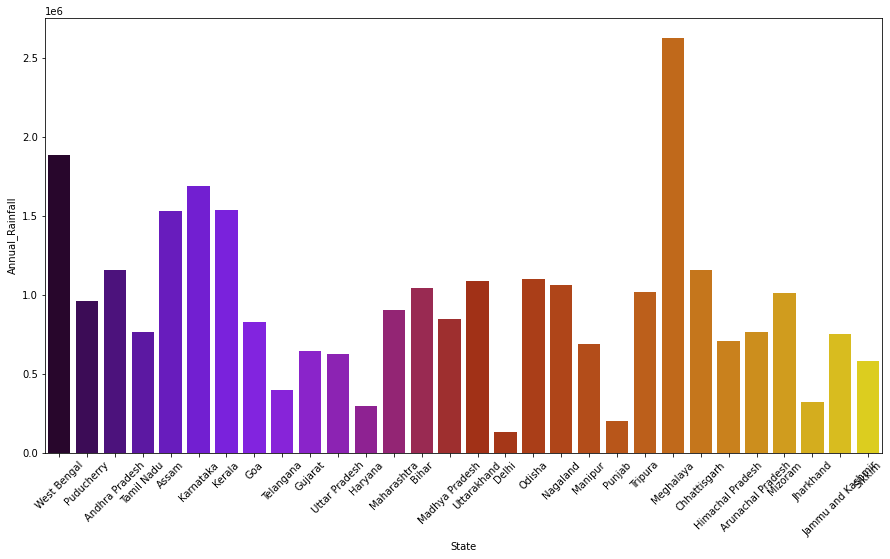

In [26]:
plt.figure(figsize = (15,8))
sns.barplot(x = df_state.index, y=df_state['Annual_Rainfall'], palette = 'gnuplot') 
plt.xticks(rotation = 45)
plt.show()

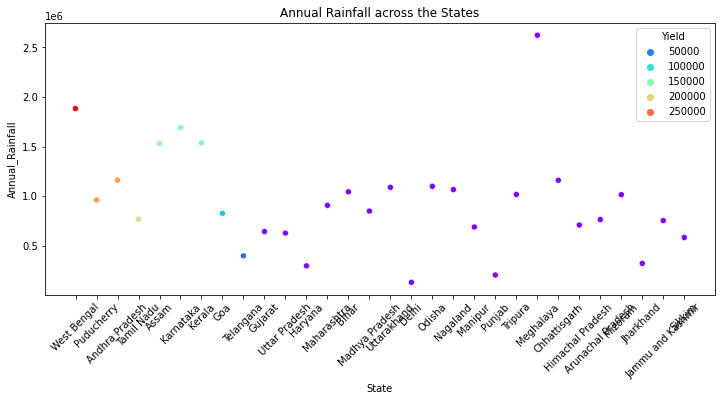

In [27]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y = df_state['Annual_Rainfall'], palette='rainbow', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Annual Rainfall across the States')
plt.show()

In [28]:
# plt.figure(figsize=(12,5))
# sns.scatterplot(x=df_state.index, y=df_state['Fertilizer'], palette='spring', hue = df_state['Yield'])
# plt.xticks(rotation=45)
# plt.title('Use of Fertilizer in Different States')
# plt.show()

### Observations:
* Annual Rainfall is highest in Chattisgarh but the yield is not the highest.
* West Bengal has the maximum yield
* Uttar Pradesh, Haryana, Maharashtra are using high amount of fertilizer but yield is not high reason can be low annual rainfall

# Season wise analysis

In [29]:
# df_Seas = df[df['Season']!='Whole Year ']

# df_season = df_Seas.groupby('Season').sum()
# df_season

In [30]:
# fig = px.bar(df_season, y = 'Area', color=df_season.index, hover_data=['Area'],text = 'Area')
# fig.show()

In [31]:
# fig = px.sunburst(df_season, path=[df_season.index, 'Yield'], values='Yield',
#                   color=df_season.index, hover_data=['Yield'])                
# fig.show()

## Observations:
* Area under cultivation in Kharif season is highest, second is Rabi season
* Crops in autumn, summer are not grown over large area
* Yield in India is maximum in Kharif season

# Crop wise Analysis

In [32]:
# Where the Yield is zero
# df_yz = df[df['Yield']==0]
# df_yz.shape

In [33]:
# df_yz.head()

In [34]:
# plt.figure(figsize = (25,15))
# sns.catplot(y="State", x="Crop",data=df_yz, aspect = 3, palette ='inferno')
# plt.xticks(rotation=45)
# plt.title('States and the Crops where yield is zero')
# plt.show()

In [35]:
# df_ynz = df[df['Yield']>0]  # where yield is more than zero
# df_crop = df_ynz.groupby('Crop').sum()
# df_crop

In [36]:
# plt.figure(figsize = (25,8))
# plt.plot(df_crop.index, df_crop['Fertilizer'],color='red', linestyle='dashed', marker='o', 
#         markersize=12, markerfacecolor='cyan')
# plt.xlabel('Crops')
# plt.ylabel('Fertilizer')
# plt.title(' Use of Fertilizer in different Crops')
# plt.xticks(rotation=30)
# plt.show()

### The amount of Fertilizer used is maximum in Rice Crop
### The second crop to use more fertilizer is Wheat crop

In [37]:
# plt.figure(figsize = (25,8))
# plt.plot(df_crop.index, df_crop['Area'],color='indigo', linestyle='dashed', marker='o', 
#         markersize=12, markerfacecolor='fuchsia')
# plt.xlabel('Crops')
# plt.ylabel('Area under cultivation')
# plt.xticks(rotation=30)
# plt.show()

#### Area under cultivation is larger for Rice and Wheat crops

# Analysis of Wheat crop

In [38]:
# df_wheat = df[df['Crop']=='Wheat']
# df_wheat.reset_index(drop=True,inplace=True)
# df_wheat

In [39]:
# df_wheat1 = df_wheat[df_wheat['Crop_Year']!=2020]
# df_wheat_year = df_wheat1.groupby('Crop_Year').sum()
# df_wheat_year

In [40]:
# plt.figure(figsize = (12,5))
# plt.plot(df_wheat_year.index, df_wheat_year['Yield'],color='red', linestyle='dashed', marker='o', 
#         markersize=12, markerfacecolor='blue')
# plt.xlabel('Year')
# plt.ylabel('Yield')
# plt.title('Yield of Wheat Crop over the Years')
# plt.show()

### Checking the co-relation in the dataset using heatmap 

## Fertilizer and Pesticide are showing the same corelation. Hence, have to drop one column to avoid Multicollinearity

# Modelling

In [12]:
df1 = df.copy()
df1 = df1.drop(['Crop_Year','Pesticide'], axis = 1)

In [42]:
# # To check the distribution of dataset
# plt.figure(figsize=(15,20))
# plt.subplot(4,2,1)
# sns.distplot(df1['Area'],bins = 20,color = 'red')
# plt.subplot(4,2,2)
# sns.distplot(df1['Production'],bins = 10,color = 'green')
# plt.subplot(4,2,3)
# sns.distplot(df1['Annual_Rainfall'],bins = 10,color = 'blue')
# plt.subplot(4,2,4)
# sns.distplot(df1['Fertilizer'],bins = 10, color = 'black')
# plt.show()

In [43]:
# Q-Q plot of the dataset
# import scipy.stats as stats

# plt.figure(figsize=(15,20))
# plt.subplot(4,2,1)
# stats.probplot(df1['Area'], dist = 'norm', plot = plt)
# plt.subplot(4,2,2)
# stats.probplot(df1['Production'], dist = 'norm', plot = plt)
# plt.subplot(4,2,3)
# stats.probplot(df1['Annual_Rainfall'], dist = 'norm', plot = plt)
# plt.subplot(4,2,4)
# stats.probplot(df1['Fertilizer'], dist = 'norm', plot = plt)
# plt.show()

### Data distribution have right skewness - to remove skewness using transformation approach
The algorithm is more likely to be biased when the data distribution is skewed

# One-Hot Encoding

In [13]:
df2=df.copy()
df2= df2.drop(['Crop_Year','Pesticide'], axis = 1)
df2

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Yield
0,Arecanut,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,0.796087
1,Arhar/Tur,Kharif,Assam,6637.0,4685,2051.4,631643.29,0.710435
2,Castor seed,Kharif,Assam,796.0,22,2051.4,75755.32,0.238333
3,Coconut,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,5238.051739
4,Cotton(lint),Kharif,Assam,1739.0,794,2051.4,165500.63,0.420909
...,...,...,...,...,...,...,...,...
19684,Small millets,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,0.500000
19685,Wheat,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,3.000000
19686,Maize,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,1.285000
19687,Rice,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,0.016667


In [14]:
df2= df2.drop(['Production','Area','Yield'], axis = 1)
df2

,Crop,Season,State,Annual_Rainfall,Fertilizer
0,Arecanut,Whole Year,Assam,2051.4,7024878.38
1,Arhar/Tur,Kharif,Assam,2051.4,631643.29
2,Castor seed,Kharif,Assam,2051.4,75755.32
3,Coconut,Whole Year,Assam,2051.4,1870661.52
4,Cotton(lint),Kharif,Assam,2051.4,165500.63
...,...,...,...,...,...
19684,Small millets,Kharif,Nagaland,1498.0,395200.00
19685,Wheat,Rabi,Nagaland,1498.0,98800.00
19686,Maize,Kharif,Jammu and Kashmir,1356.2,29586735.11
19687,Rice,Kharif,Jammu and Kashmir,1356.2,26242746.82


In [ ]:
# ONE HOT ENCODING

In [23]:
#encoding function

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
preprocesser = ColumnTransformer(
        transformers = [
            
            ('OHE', ohe, [0, 1,2]),
            ('StandardScale', scale, [3,4]),
        ],
        remainder='passthrough'
)

In [16]:
x = df2[['Crop','Season','State', 'Annual_Rainfall', 'Fertilizer']]
y = df1[['Yield']]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [18]:
x_train

,Crop,Season,State,Annual_Rainfall,Fertilizer
19466,Groundnut,Kharif,Goa,3340.395455,59804.64
17802,Barley,Kharif,Delhi,677.500000,10005.00
7014,Moth,Whole Year,Uttar Pradesh,883.400000,21650.52
14078,Barley,Rabi,Uttarakhand,1287.400000,3178311.84
8121,Cotton(lint),Kharif,Madhya Pradesh,800.800000,52295045.31
...,...,...,...,...,...
11284,Rice,Summer,Uttar Pradesh,585.800000,3847974.90
11964,Maize,Rabi,West Bengal,1096.000000,2861909.19
5390,Onion,Rabi,Tamil Nadu,970.900000,2600593.92
860,Castor seed,Kharif,Karnataka,1002.900000,2226331.87


In [29]:
X_train_dummy = preprocesser.fit_transform(x_train)
X_test_dummy = preprocesser.transform(x_test)

In [30]:
X_train_dummy

<15751x90 sparse matrix of type '<class 'numpy.float64'>'
	with 77294 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

rf_regr = RandomForestRegressor()

rf_regr.fit(X_train_dummy, y_train)

y_pred_train_regr= rf_regr.predict(X_train_dummy)
y_pred_test_regr = rf_regr.predict(X_test_dummy)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_regr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_regr))


c:\Users\TANAYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy :  0.9936991019629716
Test Accuracy :  0.9789390478977809


In [32]:
import pickle
pickle.dump(preprocesser,open('processor_encode.pkl','wb'))

In [33]:
import pickle
with open('rf_yield_model.pkl', 'wb') as f:
    pickle.dump(rf_regr, f)

In [44]:
category_columns = df1.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [45]:
df1 = pd.get_dummies(df1, columns = category_columns, drop_first=True)

In [46]:
df1.shape

(19689, 93)

In [47]:
df1.columns

Index(['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Yield',
       'Crop_Arhar/Tur', 'Crop_Bajra', 'Crop_Banana', 'Crop_Barley',
       'Crop_Black pepper', 'Crop_Cardamom', 'Crop_Cashewnut',
       'Crop_Castor seed', 'Crop_Coconut ', 'Crop_Coriander',
       'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry chillies',
       'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram', 'Crop_Groundnut',
       'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Jute',
       'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize', 'Crop_Masoor',
       'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth', 'Crop_Niger seed',
       'Crop_Oilseeds total', 'Crop_Onion', 'Crop_Other  Rabi pulses',
       'Crop_Other Cereals', 'Crop_Other Kharif pulses',
       'Crop_Other Summer Pulses', 'Crop_Peas & beans (Pulses)', 'Crop_Potato',
       'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
       'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean',
       'Crop_S

In [48]:
df1.head()

,Area,Production,Annual_Rainfall,Fertilizer,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,0.796087,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6637.0,4685,2051.4,631643.29,0.710435,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,796.0,22,2051.4,75755.32,0.238333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19656.0,126905000,2051.4,1870661.52,5238.051739,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1739.0,794,2051.4,165500.63,0.420909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split the data into dependent and independent variable

In [49]:
x = df1.drop(['Yield','Production','Area'], axis = 1)
y = df1[['Yield']]

In [50]:
print(x.shape)
y.shape

(19689, 90)


(19689, 1)

In [51]:
x.head()

,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor seed,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,2051.4,7024878.38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2051.4,631643.29,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2051.4,75755.32,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2051.4,1870661.52,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2051.4,165500.63,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
x.columns

Index(['Annual_Rainfall', 'Fertilizer', 'Crop_Arhar/Tur', 'Crop_Bajra',
       'Crop_Banana', 'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom',
       'Crop_Cashewnut', 'Crop_Castor seed', 'Crop_Coconut ', 'Crop_Coriander',
       'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry chillies',
       'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram', 'Crop_Groundnut',
       'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Jute',
       'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize', 'Crop_Masoor',
       'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth', 'Crop_Niger seed',
       'Crop_Oilseeds total', 'Crop_Onion', 'Crop_Other  Rabi pulses',
       'Crop_Other Cereals', 'Crop_Other Kharif pulses',
       'Crop_Other Summer Pulses', 'Crop_Peas & beans (Pulses)', 'Crop_Potato',
       'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
       'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean',
       'Crop_Sugarcane', 'Crop_Sunflower', 'Crop_Swe

In [52]:
y.head()

,Yield
0,0.796087
1,0.710435
2,0.238333
3,5238.051739
4,0.420909


### Splitting  the data set into train and test set

In [53]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [54]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((15751, 90), (3938, 90), (15751, 1), (3938, 1))

# Power Transformation using the method 'Yeo-Johnson'

In [55]:
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer(method='yeo-johnson')

# x_train_transform1 = pt.fit_transform(x_train)
# x_test_transform1 = pt.fit_transform(x_test)

In [56]:
# df_trans = pd.DataFrame(x_train_transform1, columns=x_train.columns)
# df_trans.head()

In [57]:
# plt.figure(figsize=(15,20))
# plt.subplot(4,2,1)
# sns.distplot(df_trans['Area'],bins = 20,color = 'red')
# plt.subplot(4,2,2)
# sns.distplot(df_trans['Production'],bins = 10,color = 'green')
# plt.subplot(4,2,3)
# sns.distplot(df_trans['Annual_Rainfall'],bins = 10,color = 'fuchsia')
# plt.subplot(4,2,4)
# sns.distplot(df_trans['Fertilizer'],bins = 10, color = 'indigo')

# plt.show()

## Viewing the Q-Q Plot after the Transformation

NameError: name 'stats' is not defined

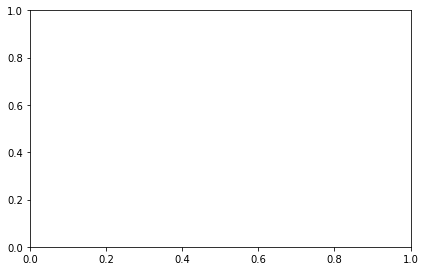

In [58]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df_trans['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df_trans['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df_trans['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df_trans['Fertilizer'], dist = 'norm', plot = plt)

plt.show()

# Linear Regression with skewed data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train)
print("Training Accuracy : ",r2_score(y_train,y_pred_train))

y_pred_test = lr.predict(x_test)
print("Test Accuracy : ",r2_score(y_test,y_pred_test))

Training Accuracy :  0.8513852890689964
Test Accuracy :  0.810421826098948


In [ ]:
# to store accuracy value
train_accu = []
test_accu = []

##  Linear Regression with Transformation Approach

In [ ]:
# lr.fit(x_train_transform1, y_train)

# y_pred_train_ = lr.predict(x_train_transform1)
# y_pred_test_ = lr.predict(x_test_transform1)

# print("Training Accuracy : ",r2_score(y_train, y_pred_train_))
# print()
# print("Test Accuracy : ",r2_score(y_test, y_pred_test_))

# train_accu.append(r2_score(y_train,y_pred_train_))
# test_accu.append(r2_score(y_test,y_pred_test_))

Training Accuracy :  0.8567977421355503

Test Accuracy :  0.8201354232680313


## Test Accuracy has improved after 'Yeo-Johnson' Transformation

### Here it is showing no case of overfitting or underfitting

## Variance Inflation Factor

In [ ]:
x1 = df_trans.copy()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x1

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x1.columns

In [ ]:
vif

,Variance Inflation Factor,Features
0,212.854374,Area
1,19.941413,Production
2,6.559733,Annual_Rainfall
3,212.233909,Fertilizer
4,4.404064,Crop_Arhar/Tur
...,...,...
87,1.333944,State_Telangana
88,1.909404,State_Tripura
89,1.717452,State_Uttar Pradesh
90,1.876362,State_Uttarakhand


VIF of the independent columns should be less than 5 to remove multicollinearity

In [ ]:
x2 = x1.copy()

In [ ]:
x2.drop(['Area'], axis = 1, inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x2

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x2.columns

In [ ]:
vif

,Variance Inflation Factor,Features
0,19.558373,Production
1,6.539186,Annual_Rainfall
2,18.454511,Fertilizer
3,4.399640,Crop_Arhar/Tur
4,4.580411,Crop_Bajra
...,...,...
86,1.321747,State_Telangana
87,1.908488,State_Tripura
88,1.717443,State_Uttar Pradesh
89,1.876031,State_Uttarakhand


In [ ]:
x2.drop(['Production'], axis = 1, inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x2

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x2.columns

In [ ]:
vif

,Variance Inflation Factor,Features
0,6.538881,Annual_Rainfall
1,2.233152,Fertilizer
2,4.390040,Crop_Arhar/Tur
3,4.580093,Crop_Bajra
4,2.504848,Crop_Banana
...,...,...
85,1.319783,State_Telangana
86,1.904214,State_Tripura
87,1.717159,State_Uttar Pradesh
88,1.874372,State_Uttarakhand


In [ ]:
x2.head()

,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor seed,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1.907533,-1.006257,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
1,-1.238092,-1.515720,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
2,-0.699476,-1.300878,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,4.733303,-0.202084,-0.241057
3,0.054274,0.286890,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,4.948440,-0.241057
4,-0.898001,1.350606,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057


In [ ]:
x_test1 = pd.DataFrame(x_test_transform1, columns=x_test.columns)
x_test1.drop(['Area','Production'], axis = 1, inplace = True)

In [ ]:
# After applying vif
lr.fit(x2, y_train)

y_pred_train_ = lr.predict(x2)
y_pred_test_ = lr.predict(x_test1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_))
print()
print("Test Accuracy : ",r2_score(y_test, y_pred_test_))

train_accu.append(r2_score(y_train,y_pred_train_))
test_accu.append(r2_score(y_test,y_pred_test_))

Training Accuracy :  0.8513570270699844

Test Accuracy :  0.8106978418521673


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

regr.fit(x_train, y_train)

y_pred_train_regr= regr.predict(x_train)
y_pred_test_regr = regr.predict(x_test)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_regr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_regr))




c:\Users\TANAYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy :  0.9945274039694109
Test Accuracy :  0.9785863066713908


In [ ]:
from sklearn.metrics import r2_score
lr_predict = regr.predict(x_test)
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.9785863066713908


In [ ]:
import pickle
with open('yield_model.pkl', 'wb') as f:
    pickle.dump(regr, f)

In [ ]:
# After applying vif
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()


regr.fit(x2, y_train)

y_pred_train_regr= regr.predict(x2)
y_pred_test_regr = regr.predict(x_test1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_regr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_regr))

train_accu.append(r2_score(y_train,y_pred_train_regr))
test_accu.append(r2_score(y_test,y_pred_test_regr))

Training Accuracy :  0.9948343792029369
Test Accuracy :  0.9773092872181616


# Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_transform1, y_train)

y_pred_train_svr= svr.predict(x_train_transform1)
y_pred_test_svr = svr.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_svr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_svr))

train_accu.append(r2_score(y_train,y_pred_train_svr))
test_accu.append(r2_score(y_test,y_pred_test_svr))

Training Accuracy :  0.007605154857080132
Test Accuracy :  0.00665600716055037


In [ ]:
# After applying vif
from sklearn.svm import SVR
svr = SVR()
svr.fit(x2, y_train)

y_pred_train_svr= svr.predict(x2)
y_pred_test_svr = svr.predict(x_test1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_svr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_svr))

train_accu.append(r2_score(y_train,y_pred_train_svr))
test_accu.append(r2_score(y_test,y_pred_test_svr))

Training Accuracy :  0.006832548844733832
Test Accuracy :  0.0059636743900916


# CatBoostRegressor

In [ ]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(learning_rate=0.15)
cat.fit(x_train_transform1, y_train)

y_pred_train_cat = cat.predict(x_train_transform1)
y_pred_test_cat = cat.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_cat))
print()
print("Test Accuracy : ",r2_score(y_test, y_pred_test_cat))

train_accu.append(r2_score(y_train,y_pred_train_cat))
test_accu.append(r2_score(y_test,y_pred_test_cat))

0:	learn: 761.1230616	total: 60.6ms	remaining: 1m
1:	learn: 662.8105298	total: 63.5ms	remaining: 31.7s
2:	learn: 581.0215933	total: 66.2ms	remaining: 22s
3:	learn: 508.0991485	total: 68.9ms	remaining: 17.1s
4:	learn: 447.4374511	total: 71.6ms	remaining: 14.2s
5:	learn: 397.2319600	total: 74.2ms	remaining: 12.3s
6:	learn: 353.9678048	total: 76.7ms	remaining: 10.9s
7:	learn: 317.6255074	total: 79.1ms	remaining: 9.8s
8:	learn: 286.9802101	total: 81.5ms	remaining: 8.97s
9:	learn: 260.7428721	total: 84.1ms	remaining: 8.32s
10:	learn: 238.9179244	total: 86.7ms	remaining: 7.8s
11:	learn: 218.7259608	total: 89.5ms	remaining: 7.37s
12:	learn: 204.6405890	total: 92.5ms	remaining: 7.02s
13:	learn: 191.2364414	total: 95.3ms	remaining: 6.71s
14:	learn: 181.5163399	total: 98ms	remaining: 6.44s
15:	learn: 171.6943632	total: 101ms	remaining: 6.2s
16:	learn: 164.7049614	total: 104ms	remaining: 5.99s
17:	learn: 157.9714167	total: 106ms	remaining: 5.8s
18:	learn: 152.5410811	total: 109ms	remaining: 5.62s

In [ ]:
# After applying vif
from catboost import CatBoostRegressor
cat = CatBoostRegressor(learning_rate=0.15)
cat.fit(x2, y_train)

y_pred_train_cat = cat.predict(x2)
y_pred_test_cat = cat.predict(x_test1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_cat))
print()
print("Test Accuracy : ",r2_score(y_test, y_pred_test_cat))

train_accu.append(r2_score(y_train,y_pred_train_cat))
test_accu.append(r2_score(y_test,y_pred_test_cat))

0:	learn: 767.3217622	total: 2.96ms	remaining: 2.96s
1:	learn: 672.8657173	total: 5.58ms	remaining: 2.78s
2:	learn: 584.4576801	total: 8.01ms	remaining: 2.66s
3:	learn: 512.9915511	total: 10.2ms	remaining: 2.53s
4:	learn: 451.1300016	total: 12.5ms	remaining: 2.49s
5:	learn: 397.5002202	total: 14.7ms	remaining: 2.44s
6:	learn: 354.7822323	total: 17ms	remaining: 2.4s
7:	learn: 316.9294120	total: 19.3ms	remaining: 2.39s
8:	learn: 286.5877685	total: 21.6ms	remaining: 2.38s
9:	learn: 259.4915673	total: 23.9ms	remaining: 2.37s
10:	learn: 239.0265422	total: 26.2ms	remaining: 2.36s
11:	learn: 220.5935906	total: 28.4ms	remaining: 2.34s
12:	learn: 205.5043374	total: 31.8ms	remaining: 2.41s
13:	learn: 192.7464731	total: 34.4ms	remaining: 2.42s
14:	learn: 182.4722418	total: 36.5ms	remaining: 2.4s
15:	learn: 174.0475529	total: 38.7ms	remaining: 2.38s
16:	learn: 164.7072117	total: 41ms	remaining: 2.37s
17:	learn: 157.7552075	total: 43.2ms	remaining: 2.36s
18:	learn: 152.1955154	total: 45.7ms	remaini

# Comparison of the models

In [ ]:
algorithm = ['LinearRegression','LRvif','RandomForestRegressor','RFRvif','SupprtVectorRegressor','SVRvif','CatBoostRegressor','CBRvif']
accu_data = {'Training Accuracy':train_accu,'Test Accuracy':test_accu}
model = pd.DataFrame(accu_data, index = algorithm)
model

,Training Accuracy,Test Accuracy
LinearRegression,0.856798,0.820135
LRvif,0.851357,0.810698
RandomForestRegressor,0.995745,0.980616
RFRvif,0.994834,0.977309
SupprtVectorRegressor,0.007605,0.006656
SVRvif,0.006833,0.005964
CatBoostRegressor,0.999827,0.969248
CBRvif,0.999609,0.967983


# Conclusion

* Machine Learning Algorithm can be used to predict the crop yield in different states
* Challenge is to have the authentic dataset